### 피싱(Phishing)이란?   
- 사기의 한 형태로, 공격자가 이메일이나 기타 통신 채널을 통해 알려진 연락처나 기관으로 위장하여   
  사용자의 로그인 자격 증명이나 계정 정보와 같은 민감한 정보를 탈취하려고 시도하는 사례를 의미    
  
- 흔히 피해자는 알고 있는 사람이나 기관에서 온 것처럼 보이는 메시지를 받게 되며, 이 메시지는 사용자의 컴퓨터에 악성 소프트웨어를 전달하거나   
  악성 웹사이트로 유도하여 개인 및 금융 정보(비밀번호, 계정 ID, 신용 카드 정보 등)를 빼내도록 속이는 것을 목적으로 함

### URL의 구성 요소 
- 참고) https://www.kaggle.com/code/akashkr/phishing-url-eda-and-modelling
- Uniform Resource Locator(URL)은 웹 페이지의 위치를 지정하기 위해 만들어짐   
  아래 예시를 통해 이해해보자

예시) https://www.exampleurl.com/info/aboutus.html  

https:// ------- protocol   
www ---------- third-level Domain  
exampleurl --- second-level Domain  
.com ---------- top-level Domain   
/info ---------- directory   
aboutus.html - file  

www ------------- subdomain name  
exampleurl.com - Domain name   
aboutus.html ---- page   

www.exampleurl.com -- hostname   
/info/aboutus.html ----- path   

- 피셔(Phisher)는 서브도메인 부분과 경로 및 파일 구성 요소를 완전히 제어할 수 있음   
  URL에는 피셔가 자유롭게 설정할 수 있는 부분이 있는데 이를 "FreeURL"이라고 지칭함

- 공격자(Attacker)는 아직 등록되지 않은 어떤 도메인 이름이라도 등록가능함  
  이 부분의 URL은 한 번 설정되면 다시 변경할 수 없음, 그러나 피셔는 언제든지 FreeURL을 변경하여 새로운 URL을 생성할 수 있음

- 보안 방어자들이 피싱 도메인을 탐지하는 데 어려움을 겪는 이유는 바로 웹사이트 도메인의 고유한 부분인 FreeURL 때문   
  도메인이 피싱으로 감지되면 이 도메인에 접근하기 전에 쉽게 차단할 수 있을 것임

### Dataset Description 
: URL로부터 추출할 수 있는 4가지 유형의 특징(Features)

1) Address Bar based Features (주소 표시줄 기반 특징)  
2) Abnormal Based Features (비정상 기반 특징)  
3) HTML and JavaScript based Features (HTML 및 JavaScript 기반 특징)  
4) Domain based Features (도메인 기반 특징)


#### 1) Address Bar Based Features (주소 표시줄 기반 특징)  

1. Using the IP Address  
: URL에서 도메인 이름 대신 IP 주소가 사용되면 피싱 웹사이트일 가능성이 있다.  
: IP 주소는 16진수 코드로 변환되기도 한다.  
: ex) http://125.98.3.123/fake.html  
</br> 

2. Long URL to Hide the Suspicious Part   
: 의심스러운 부분을 숨기기 위해 긴 URL을 사용하면 피싱 웹사이트일 가능성이 있다.  
: 연구에 따르면() URL 길이가 54자 이상인 경우 피싱으로 분류될 가능성이 높다.  
  54자 미만 -> 정상  
  54자 이상 75자 이하 -> 의심  
  75자 초과 -> 피싱  
</br>  

3. Using URL Shortening Services “TinyURL”   
: TinyURL과 같은 URL 단축 서비스를 사용한 짧은 URL은 피싱 웹사이트일 가능성이 있다.  
: ex) http://portal.hud.ac.uk/ ---> bit.ly/19DXSk4  
</br>

4. URL’s having “@” Symbol  
: URL에 '@' 기호를 사용하면 브라우저는 '@' 기호 앞의 모든 것을 무시하고 실제 주소는 '@' 기호 뒤에 따라온다.  
: 그렇기 때문에 '@' 기호를 사용한 경우 피싱 웹사이트를 감추기 위한 시도일 가능성이 있다.  
</br>  

5. Redirecting using “//”  
: URL에 '//'이 존재하면 다른 웹사이트로 리디렉션 된다.  
: 예를 들어 http://www.legitimate.com//http://www.phishing.com의 경우, 해당 URL을 입력하면 www.phishing.com으로 연결된다.  
: URL이 'HTTP'로 시작되는 경우 '//'는 6번째에, 'HTTPS'로 시작되는 경우 7번째에 있어야 한다.  
: 이외의 경우는 피싱 웹사이트로 리디렉션 하려는 시도일 가능성이 있다.   
</br>  

6. Adding Prefix or Suffix Separated by (-) to the Domain  
: 정상 URL에서는 하이픈(-) 기호가 거의 사용되지 않는다.  
: 도메인에 접두사 또는 접미사로 하이픈(-)이 사용된다면 정상 웹사이트를 모방한 피싱 웹사이트일 가능성이 있다.  
</br>  

7. Sub Domain and Multi Sub Domains  
: 도메인 이름에는 국가 코드 최상위 도메인(ccTLD)이 포함될 수 있다.  
: 예를 들어 http://www.hud.ac.uk/students/의 경우, 'uk'가 이에 해당한다.  
: URL에서 www와 ccTLD를 제거하고 남은 점의 수를 세어 정상 비정상 여부를 확인할 수 있다.  
  도메인 부분에 점이 1개 -> 정상  
  도메인 부분에 점이 2개 -> 의심  
  도메인 부분에 점이 3개 이상 -> 피싱  
</br>  

8. HTTPS (Hyper Text Transfer Protocol with Secure Sockets Layer)  
: HTTP 대신 HTTPS를 사용한다면 웹사이트가 정상일 수 있지만 이것만으로는 충분하지 않다.  
: 발급자가 신뢰할 수 있는 기관인지, 인증서 유효기간은 몇년인지 여부를 확인해야 한다.  
: 신뢰할 수 있는 인증 기관으로는 "GeoTrust, GoDaddy, Network Solutions, Thawte, Comodo, Doster, VeriSign' 등이 있으며, 신뢰할 수 있는 인증서의 최소 유효기간은 2년이다.  
</br>  

9. Domain Registration Length  
: 피싱 웹사이트는 짧은 기간 동안만 사용되기 때문에 도메인 등록 기간이 1년 미만이라면 피싱 웹사이트일 가능성이 있다.  
</br>  

10. Favicon  
: 파비콘은 특정 웹페이지와 연결된 그래픽 이미지(아이콘)이다.  
: 파비콘이 주소 표시줄에 표시된 도메인과 다른 도메인에서 로드되면 피싱 시도일 가능성이 있다.  
</br>  

11. Using Non-Standard Port  
: 이는 특정 서버에서 특정 서비스(e.g. HTTP)가 작동 중인지 확인하는데 유용하다.  
: 여러 방화벽, 프록시 및 네트워크 주소 변환(NAT) 서버는 기본적으로 모든 포트를 차단하고 선택된 포트만 연다. 반대로 모든 포트가 열려 있으면 사용자 정보가 위협받을 수 있다.  
</br>  

12. The Existence of “HTTPS” Token in the Domain Part of the URL  
: URL 도메인 부분에 'HTTPS' 토큰을 추가한다면 사용자를 속이기 위한 시도일 가능성이 있다.  
: ex) http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/  
</br>  



#### 2) Abnormal Based Features (비정상 기반 특징)  

1. Request URL   
: 웹페이지 내에 포함된 외부 객체(이미지, 동영상, 소리 등)가 다른 도메인에서 로드되는지 여부를 검사한다.  
: 정상 웹페이지에서는 웹페이지 주소와 웹페이지 내에 포함된 대부분의 객체가 동일한 도메인을 공유한다.  
  Request URL의 비율이 22% 미만 -> 정상  
  Request URL의 비율이 22% 이상 61% 이하 -> 의심  
  Request URL의 비율이 61% 초과 -> 피싱
</br>  

2. URL of Anchor  
: 앵커는 \<a> 태그로 정의된 요소이다. 이는 상위 Request URL과 동일하게 기능한다.  
: 그러나 이 경우는 \<a>태그와 웹사이트가 다른 도메인 이름을 가지고 있는지 여부를 검사한다.  
  Anchor URL의 비율이 31% 미만 -> 정상  
  Anchor URL의 비율이 31% 이상 67% 이하 -> 의심
  Anchor URL의 비율이 67% 초과 -> 피싱  
</br>  

3. Links in \<Meta>, \<Script> and \<Link> tags  
\<Meta>, \<Script> 및 \<Link> 태그의 링크 비율이 17% 미만 -> 정상  
\<Meta>, \<Script> 및 \<Link> 태그의 링크 비율이 17% 이상 81% 이하 -> 의심  
\<Meta>, \<Script> 및 \<Link> 태그의 링크 비율이 81% 초과 -> 피싱  
</br>  

4. Server Form Handler (SFH)  
: 빈 문자열이나 'about:blank'를 포함하는 SFH는 피싱 웹사이트일 가능성이 있다.  
: 그 외에 SFH가 다른 도메인을 참조하는 경우는 의심해봐야한다.   
</br>  

5. Submitting Information to Email  
: mail()함수와 같은 서버 측 스크립트 언어가 사용되는 경우, 사용자로 하여금 개인 정보를 피셔 자신의 이메일로 리디렉션할 수 있기 때문에 피싱 웹사이트일 가능성이 있다.  
: 또 다른 클라이언트 측 함수는 'mailto:'가 있다.  
</br>  

6. Abnormal URL  
: 이 기능은 WHOIS 데이터베이스에서 추출할 수 있다.  
: 정상 웹사이트의 경우, URL의 일부로서 식별 정보가 포함되는 것이 일반적이다.  
  호스트 이름이 URL에 포함되지 않은 경우 -> 피싱  
  그외 -> 정상   
</br>  

#### 3) HTML and JavaScript based Features¶ (HTML 및 자바스크립트 기반 특징)  

1. Website Forwarding (웹사이트 전환)
: 웹사이트의 피싱 여부를 구별하는 중요한 요소는 웹사이트의 리디렉션 횟수이다.  
: 일반적으로 정상적인 웹사이트는 최대 1번 리디렉션된 것에 반해 피싱 사이트는 최소 4번 이상 리디렉션 되었다.  
</br>  

2. Status Bar Customization (상태 표시줄 사용자 정의)  
: 피셔는 자바스크립트를 사용하여 사용자의 상태 표시줄에 가짜 URL을 표시할 수 있다.  
: 이를 확인하기 위해 웹페이지 소스 코드에서 'onMouseOver'를 찾아보고 이것이 상태 표시줄에 어떤 변경을 행하는지 확인해야 한다. 
  onMouseOver가 상태 표시줄을 변경 -> 피싱  
  그외 -> 정상  
</br>  

3. Disabling Right Click (우클릭 비활성화)  
: 피셔는 자바스크립트를 사용하여 우클릭 기능을 비활성화 함으로서 사용자가 웹페이지 소스 코드를 볼 수 없도록 한다.  
: 이 기능은 웹페이지 소스 코드에서 'event.button==2'를 찾음으로써 우클릭 비활성화 여부를 확인할 수 있다.   
</br>   

4. Using Pop-up Window (팝업 창 사용) 
: 정상 웹사이트에서는 팝업 창을 통해 사용자에게 개인 정보를 제출하도록 요구하는 경우가 드물다.  
  팝업 창에 텍스트 필드가 포함된 경우 -> 피싱  
  그외 -> 정상  
</br>  

5. IFrame Redirection  
: IFrame은 현재 표시되고 있는 웹페이지에 추가 웹페이지를 표시하는 HTML 태그이다.  
: 피셔는 해당 태그를 사용하여 표시되는 프레임을 경계 없이 만들고 사용할 수 있다.  
  IFrame 사용 -> 피싱  
  그외 -> 정상  
</br>  



#### 4) Domain based Features (도메인 기반 특징)

1. Age of Domain (도메인 유효기간/연령)  
: 이것은 WHOIS 데이터베이스에서 추출할 수 있다.  
: 대부분의 피싱 웹사이트는 짧은 기간에만 존재하며 연구 결과, 정상 웹사이트의 최소 유효기간은 6개월이다.  
</br>  

2. DNS Record  
: 피싱 웹사이트의 경우, 선언된 식별 정보가 WHOIS 데이터베이스에서 인식되지 않거나 호스트 이름에 대한 레코드가 없을 수 있다.  
: DNS 레코드가 비어있거나 발견되지 않으면 웹사이트는 피싱으로 분류된다.  
</br>  

3. Website Traffic  
: 피싱 웹사이트는 짧은 기간동안만 유지되지 때문에 Alexa 데이터베이스에서 인식되지 않을 수 있다.  
: 그렇기 때문에 방문자 수와 방문자가 방문한 페이지 수를 측정하기 어렵고, 결과적으로 웹사이트 순위가 낮다.  
 웹사이트 순위 < 100,000 -> 정상  
 웹사이트 순위 > 100,000 -> 의심  
 그외 -> 피싱  
</br>  

4. PageRank  
: PageRank는 인터넷에서 웹페이지의 중요성을 측정하는 값으로, 0에서 1 사이의 값을 갖는다.  
: 대부분의 피싱 웹사이트는 PageRank가 없으며, 소수의 PageRank 보유 피싱 사이트는 0.2 이상의 값을 갖지 못한다.  
</br>  

5. Google Index  
: 웹사이트가 구글 인덱스에 포함되어 있는지 여부를 확인하여 피싱 웹사이트 여부를 확인할 수 있다.  
  웹페이지가 구글에 인덱싱 되는 경우 -> 정상  
  웹페이지가 구글에 인덱싱 안되는 경우 -> 피싱  
</br>  

6. Number of Links Pointing to Page  
: 웹페이지로 향하는 링크의 수는 웹페이지의 합법성 수준을 나타낸다.  
: 대부분의 피싱 웹사이트는 링크를 가지고 있지 않다. 반면 정상 사이트는 적어도 2개의 외부 링크를 가지고 있다.  
</br>  

7. Statistical-Reports Based Feature (통계 보고서 기반 특징)  
: PhishTank와 StopBadware 등 여러 곳에서 주기적으로 피싱 웹사이트에 대한 다양한 통계 보고서를 작성한다.  
: 호스트가 해당 보고서의 최상위 피싱 IP 또는 최상위 피싱 도메인에 속한다면 피싱임을 확인할 수 있다.  

In [8]:
#!pip install tld 

   ---------------------------------------- 0.0/263.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/263.8 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/263.8 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 256.0/263.8 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 263.8/263.8 kB 2.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Libraries 

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

### Load Dataset

In [2]:
data = pd.read_csv('./malicious_phish.csv')
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [4]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [5]:
count = data.type.value_counts()
count

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

#### 데이터 설명 
1.Benign(정상)
- 정상 웹사이트는 악의적인 의도를 가지지 않은 안전한 웹사이트를 의미  
- 이러한 웹사이트는 사용자의 개인정보를 보호하고, 악성 소프트웨어를 포함하지 않으며 전체적으로 신뢰할 수 있음 

2.Defacement(웹사이트 훼손)  
- 웹사이트 훼손은 해커가 웹사이트의 내용을 무단으로 변경하거나, 외부 메세지를 삽입하는 행위를 의미  
- 이러한 행위는 보통 웹사이트의 외관을 망가뜨리거나, 해커의 메세지를 전달하기 위해 수행됨  

3.Phishing(피싱)  
- 피싱은 사용자로부터 민감한 정보를 훔치기 위해 사용되는 사기 수법  
- 이는 보통 가짜 웹사이트를 만들어 사용자가 로그인 정보, 신용카드 번호 등의 개인정보를 입력하도록 유도함  

4.Malware(악성코드)  
- 악성코드는 컴퓨터나 네트워크에 해를 끼치기 위해 고안된 소프트웨어를 의미  
- 바이러스, 트로이 목마, 스파이웨어, 랜섬웨어 등이 이에 해당  
- 사용자 정보 도용, 시스템 손상 등의 피해를 줄 수 있음 

-> 4개의 카테고리로 되어있으나 2~4 데이터는 근본적으로 피싱 데이터에 해당한다고 판단했기에 2~4 데이터를 피싱 데이터로 처리하고 정상/비정상 이진분류로 진행함

In [3]:
data['type'] = data['type'].replace(['defacement', 'malware'], 'phishing')

In [4]:
data['type']

0         phishing
1           benign
2           benign
3         phishing
4         phishing
            ...   
651186    phishing
651187    phishing
651188    phishing
651189    phishing
651190    phishing
Name: type, Length: 651191, dtype: object

In [8]:
count = data['type'].value_counts()
count

type
benign      428103
phishing    223088
Name: count, dtype: int64

정상 웹사이트 비율: 65.74%  
피싱 웹사이트 비율: 34.26%

Text(0, 0.5, 'Count')

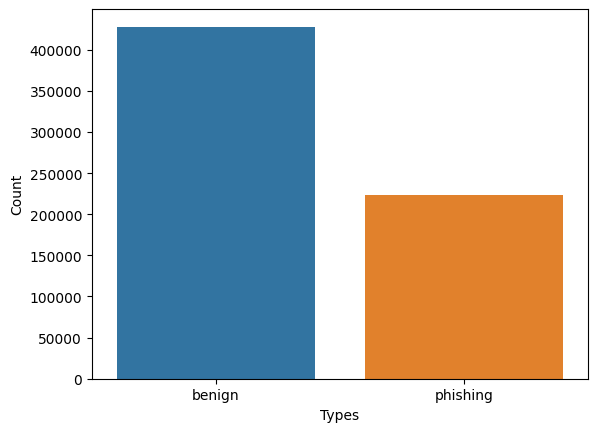

In [9]:
sns.barplot(x=count.index, y=count, hue=count.index)
plt.xlabel('Types')
plt.ylabel('Count')

데이터 내 모든 URL을 표준화하기 위해 www.를 제거 (비교가능성 향상) 

In [5]:
data['url'] = data['url'].replace('www', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://.garage-pirenne.be/index.php?option=com...,phishing
4,http://adventure-nicaragua.net/index.php?optio...,phishing
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


각 카테고리 문자열을 숫자로 매핑하여 Category 컬럼에 추가 

In [6]:
rem = {"Category": {"benign": 0, "phishing":1}}
data['Category'] = data['type']
data = data.replace(rem)

In [12]:
data.head()

,url,type,Category
0,br-icloud.com.br,phishing,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://.garage-pirenne.be/index.php?option=com...,phishing,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,1


### Feature Extraction 

In [7]:
# url 길이 추출
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

URL의 최상위 도메인(TLD)를 처리하고, URL에서 주요 도메인 부분을 추출하는 함수 생성 

In [8]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc  # URL의 주요 도메인 추출
    except :
        pri_domain= None
    return pri_domain

In [15]:
# 예시 
url = "https://www.example.com/path"

primary_domain = process_tld(url)
print(primary_domain)

www.example.com


url컬럼 내 데이터를 함수에 넣어서 주요 도메인만 추출한 후 새로운 컬럼으로 추가

In [9]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [17]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://.garage-pirenne.be/index.php?option=com...,phishing,1,85,.garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,phishing,1,235,adventure-nicaragua.net


특수문자 갯수를 count하여 각 특수문자 컬럼으로 추가 

In [10]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [19]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://.garage-pirenne.be/index.php?option=com...,phishing,1,85,.garage-pirenne.be,0,1,1,4,3,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,phishing,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


주어진 URL이 비정상적인지 여부를 판단하는 함수 생성  
URL에서 호스트 이름(hostname)을 추출하고 해당 호스트 이름이 URL 문자열 내에 포함되어 있는지를 0과 1로 구분  
-> Abnormal URL: 호스트 이름이 URL 내에 포함되어 있으면 정상, 포함되어 있지 않으면 피싱 

In [11]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        return 0
    else: 
        return 1

In [12]:
# 적용
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

C:\Users\skqk3\AppData\Local\Temp\ipykernel_21176\822950520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='abnormal_url', data=data, palette='Set2');


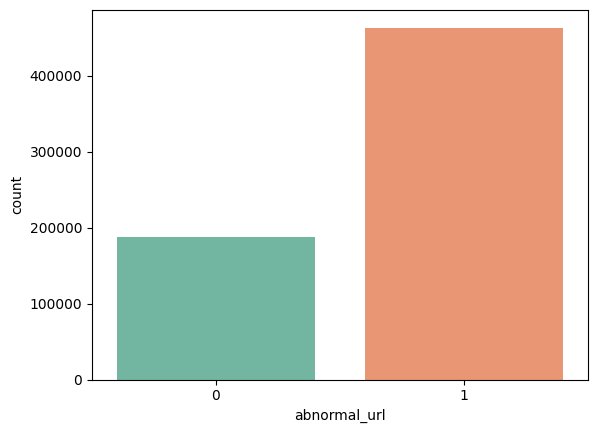

In [22]:
# 시각화
sns.countplot(x='abnormal_url', data=data, palette='Set2');

In [23]:
# abnormal_url 열 값의 비율 계산
ratio = data['abnormal_url'].value_counts(normalize=True) * 100

# 결과 출력
print("정상(0)의 비율: {:.2f}%".format(ratio[0]))
print("피싱(1)의 비율: {:.2f}%".format(ratio[1]))

정상(0)의 비율: 28.87%
피싱(1)의 비율: 71.13%


입력받은 URL이 HTTPS 프로토콜을 사용하는지 여부를 판별하는 함수 생성 

In [13]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 0
    else:
        # print 'No matching pattern found'
        return 1

In [14]:
# 적용
data['https'] = data['url'].apply(lambda i: httpSecure(i))

C:\Users\skqk3\AppData\Local\Temp\ipykernel_21176\1135013659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='https', data=data, palette='Set2');


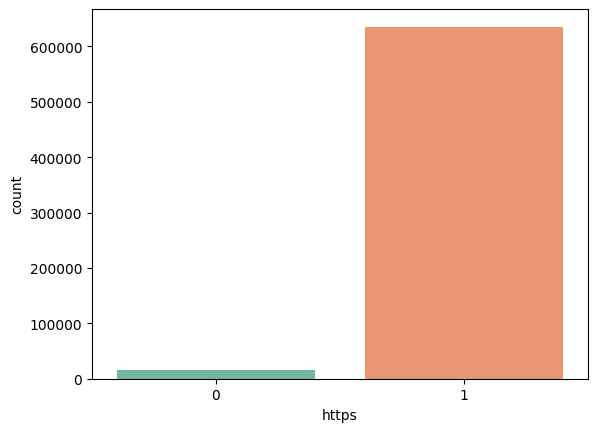

In [26]:
sns.countplot(x='https', data=data, palette='Set2');

In [27]:
# abnormal_url 열 값의 비율 계산
ratio = data['https'].value_counts(normalize=True) * 100

# 결과 출력
print("정상(0)의 비율: {:.2f}%".format(ratio[0]))
print("피싱(1)의 비율: {:.2f}%".format(ratio[1]))

정상(0)의 비율: 2.41%
피싱(1)의 비율: 97.59%


입력받은 URL에서 숫자(digit)의 갯수를 세는 함수 생성

In [15]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [16]:
# 적용
data['digits']= data['url'].apply(lambda i: digit_count(i))

입력받은 URL에서 문자(letters)의 갯수를 세는 함수 생성 

In [17]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [18]:
# 적용 
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [32]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,+,$,!,*,",",//,abnormal_url,https,digits,letters
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,1,1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,1,1,25
3,http://.garage-pirenne.be/index.php?option=com...,phishing,1,85,.garage-pirenne.be,0,1,1,4,3,...,0,0,0,0,0,1,0,1,7,60
4,http://adventure-nicaragua.net/index.php?optio...,phishing,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,1,0,1,22,199


입력받은 URL이 URL 단축 서비스를 사용하는지 여부를 0과 1로 구분하는 함수 생성

In [19]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if not match:
        return 0
    else:
        return 1

In [20]:
# 적용
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

C:\Users\skqk3\AppData\Local\Temp\ipykernel_21176\3175507091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shortining_Service', data=data, palette='Set2');


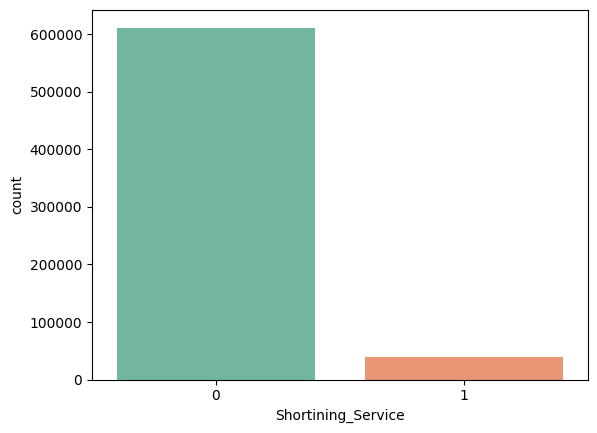

In [41]:
sns.countplot(x='Shortining_Service', data=data, palette='Set2');

In [42]:
# abnormal_url 열 값의 비율 계산
ratio = data['Shortining_Service'].value_counts(normalize=True) * 100

# 결과 출력
print("정상(0)의 비율: {:.2f}%".format(ratio[0]))
print("피싱(1)의 비율: {:.2f}%".format(ratio[1]))

정상(0)의 비율: 93.90%
피싱(1)의 비율: 6.10%


In [43]:
# 단축 서비스를 사용하는 URL 필터링
shortened_urls = data[data['Shortining_Service'] == 1]

# 단축 서비스를 사용하는 URL 개수
shortened_urls_count = len(shortened_urls)

# 결과 출력
print("단축 서비스를 사용하는 URL 개수:", shortened_urls_count)
print(shortened_urls[['url']])

단축 서비스를 사용하는 URL 개수: 39755
                                                      url
7          yourbittorrent.com/?q=anthony-hamilton-soulife
28      http://.marketingbyinternet.com/mo/e56508df639...
37                          cyndislist.com/us/pa/counties
62                               veoox.com/tags/game.html
63                          chuckwalkertrio.blogspot.com/
...                                                   ...
651175  games.teamxbox.com/xbox-360/1189/Condemned-Cri...
651177  .gamespot.com/condemned-criminal-origins/platf...
651180  games.teamxbox.com/xbox-360/1737/Condemned-2-B...
651187       games.teamxbox.com/xbox-360/1860/Dead-Space/
651188            .gamespot.com/xbox360/action/deadspace/

[39755 rows x 1 columns]


입력받은 URL이 IP주소를 포함하는지 여부를 판별하는 함수 생성

In [21]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if not match:
        return 0
    else:
        return 1

- IPv4 패턴: IPv4 주소를 인식하는 여러 패턴을 포함. 각 구성요소는 0부터 255사이의 숫자를 나타내는 패턴임. IPv4 주소 뒤에 포트 번호가 있는 경우도 인식함  

- IPv4 hexadecimal 패턴: '0x'로 시작하는 16진수 형식의 IPv4 주소도 인식  

- IPv6 패턴: IPv6 주소도 인식  

In [22]:
# 적용 
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

C:\Users\skqk3\AppData\Local\Temp\ipykernel_21176\1874568971.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='having_ip_address', data=data, palette='Set2');


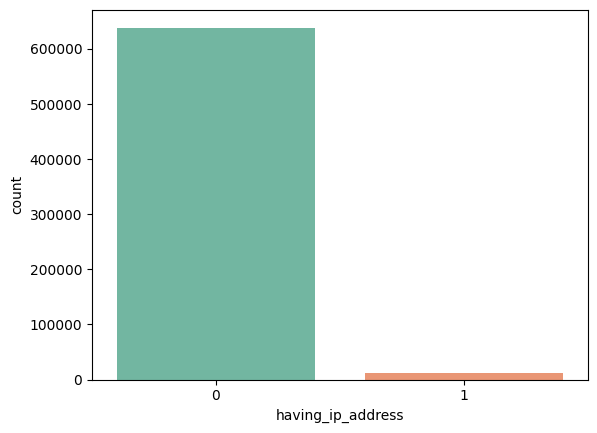

In [47]:
sns.countplot(x='having_ip_address', data=data, palette='Set2');

In [48]:
# abnormal_url 열 값의 비율 계산
ratio = data['having_ip_address'].value_counts(normalize=True) * 100

# 결과 출력
print("정상(0)의 비율: {:.2f}%".format(ratio[0]))
print("피싱(1)의 비율: {:.2f}%".format(ratio[1]))

정상(0)의 비율: 98.08%
피싱(1)의 비율: 1.92%


In [49]:
# IP 주소를 포함하는 URL 필터링
IP_urls = data[data['having_ip_address'] == 1]

# IP 주소를 포함하는 URL 개수
IP_urls_count = len(IP_urls)

# 결과 출력
print("IP 주소를 포함하는 사용하는 URL 개수:", IP_urls_count)
print(IP_urls[['url']])

IP 주소를 포함하는 사용하는 URL 개수: 12488
                                                      url
5719     77.228.191.183:7674/zeujuus/a/modules/config.bin
10408   http://219.232.244.89/intl/update/error_login.htm
12441   boards.ancestry.com/topics.ethnic.natam.nation...
12853   http://.controlyourbreath.com/new/css_/img/web...
13161   http://.reqntpvw.com/Public/softs/everything/2...
...                                                   ...
642230  citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1...
642252  citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1...
642253  citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1...
642325  citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1...
642334  citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1...

[12488 rows x 1 columns]


입력받은 URL 길이를 리턴하고, URL이 75자를 넘는지 여부에 따라 피싱 웹사이트를 판단

In [23]:
def long_url(url):
    if len(url) <= 75:
        return 0  # URL 길이가 75자 이하면 0으로 표시 (정상)
    else:
        return 1  # URL 길이가 75자를 초과하면 1로 표시 (피싱)

In [24]:
# 적용
data['long_url_phishing'] = data['url'].apply(lambda x: long_url(x))

C:\Users\skqk3\AppData\Local\Temp\ipykernel_21176\2206559153.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='long_url_phishing', data=data, palette='Set2');


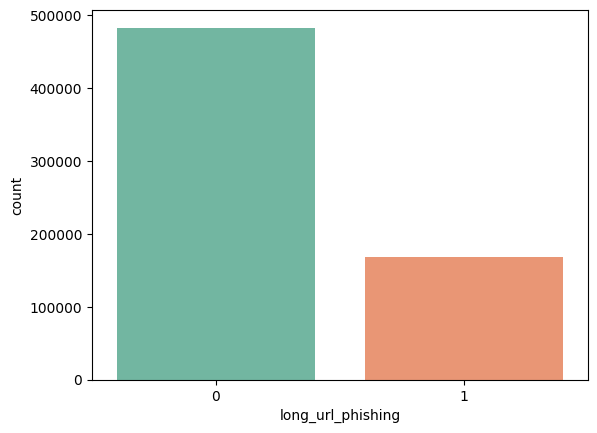

In [53]:
sns.countplot(x='long_url_phishing', data=data, palette='Set2');

In [54]:
# abnormal_url 열 값의 비율 계산
ratio = data['long_url_phishing'].value_counts(normalize=True) * 100

# 결과 출력
print("정상(0)의 비율: {:.2f}%".format(ratio[0]))
print("피싱(1)의 비율: {:.2f}%".format(ratio[1]))

정상(0)의 비율: 74.16%
피싱(1)의 비율: 25.84%


입력받은 URL에 하이픈(-) 기호가 있으면 피싱 웹사이트일 것이다. 

In [25]:
def hyphen_in_url(url):
    if '-' not in url:
        return 0  # URL에 하이픈(-)이 없으면 0으로 표시 (정상)
    else:
        return 1  # URL에 하이픈(-)이 포함되어 있으면 1로 표시 (피싱)

In [26]:
data['hyphen_in_url'] = data['url'].apply(lambda x: hyphen_in_url(x))

C:\Users\skqk3\AppData\Local\Temp\ipykernel_21176\863413413.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hyphen_in_url', data=data, palette='Set2');


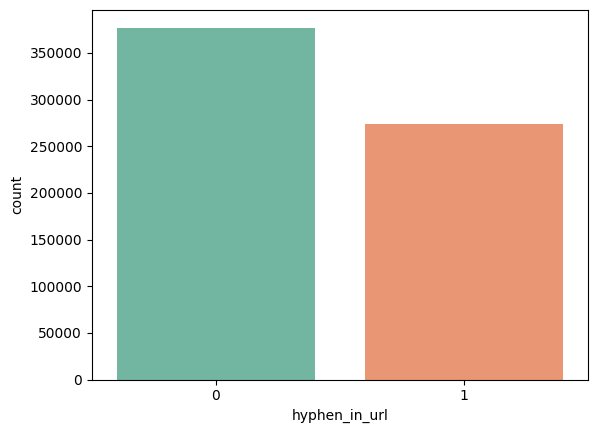

In [57]:
sns.countplot(x='hyphen_in_url', data=data, palette='Set2');

In [58]:
# abnormal_url 열 값의 비율 계산
ratio = data['hyphen_in_url'].value_counts(normalize=True) * 100

# 결과 출력
print("정상(0)의 비율: {:.2f}%".format(ratio[0]))
print("피싱(1)의 비율: {:.2f}%".format(ratio[1]))

정상(0)의 비율: 57.93%
피싱(1)의 비율: 42.07%


---

data 데이터프레임 내 컬럼들 간의 상관관계 확인 & 히트맵으로 시각화

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 651191 non-null  object
 1   type                651191 non-null  object
 2   Category            651191 non-null  int64 
 3   url_len             651191 non-null  int64 
 4   domain              638974 non-null  object
 5   @                   651191 non-null  int64 
 6   ?                   651191 non-null  int64 
 7   -                   651191 non-null  int64 
 8   =                   651191 non-null  int64 
 9   .                   651191 non-null  int64 
 10  #                   651191 non-null  int64 
 11  %                   651191 non-null  int64 
 12  +                   651191 non-null  int64 
 13  $                   651191 non-null  int64 
 14  !                   651191 non-null  int64 
 15  *                   651191 non-null  int64 
 16  , 

In [60]:
# 모든 컬럼 중 숫자형 컬럼만 추출하여 상관관계를 확인 
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

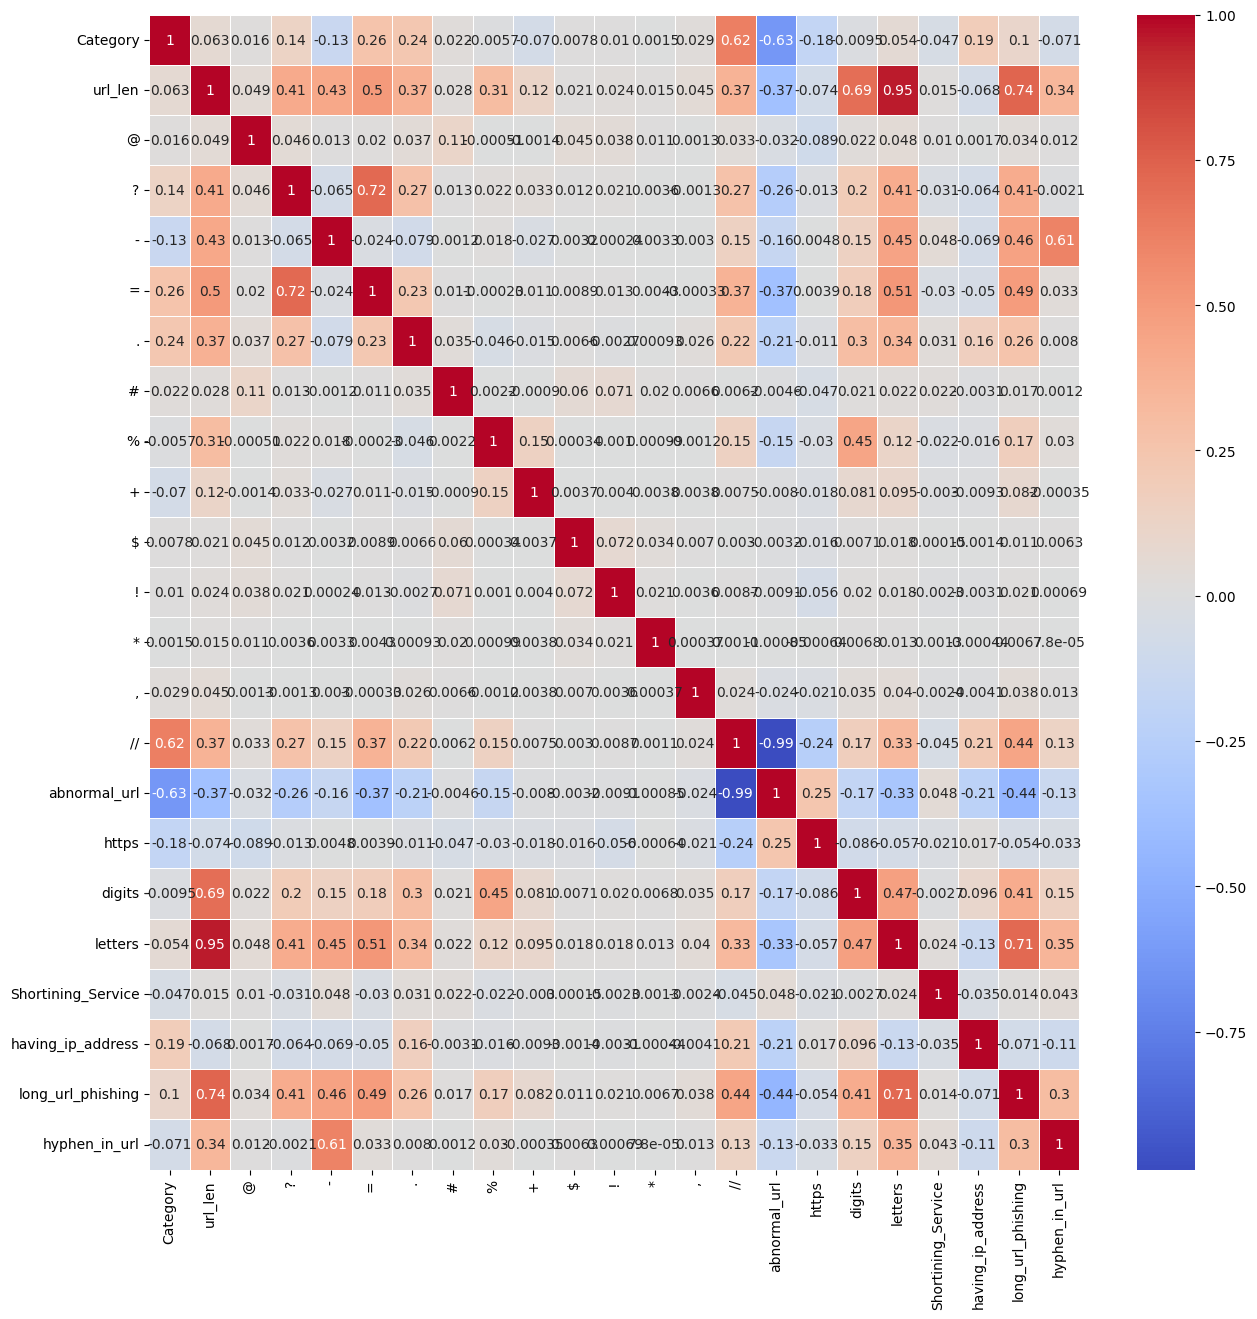

In [61]:
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

상관관계 0.4이상을 유의미한 수치로 판단하고 관련 변수들과 수치를 한 눈에 알아보기 쉽도록 정리

In [62]:
# 전체 데이터프레임에서 상관관계가 0.4 이상인 부분만 필터링하여 새로운 데이터프레임 생성
high_corr = numeric_cols.corr()[(numeric_cols.corr() > 0.4) | (numeric_cols.corr() < -0.4)]

# 상관관계가 0.4 이상인 셀만 추출하여 정리
high_corr = high_corr[high_corr != 1.0].stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 상관관계가 0.4 이상인 부분만 표시
high_corr = high_corr.loc[(high_corr['Correlation'] > 0.4) | (high_corr['Correlation'] < -0.4)]

# 출력
print(high_corr)


           Variable 1         Variable 2  Correlation
0            Category                 //     0.620689
1            Category       abnormal_url    -0.629827
2             url_len                  ?     0.411687
3             url_len                  -     0.432100
4             url_len                  =     0.500636
5             url_len             digits     0.690205
6             url_len            letters     0.954149
7             url_len  long_url_phishing     0.735067
8                   ?            url_len     0.411687
9                   ?                  =     0.717956
10                  ?            letters     0.407550
11                  ?  long_url_phishing     0.405008
12                  -            url_len     0.432100
13                  -            letters     0.449511
14                  -  long_url_phishing     0.458916
15                  -      hyphen_in_url     0.611746
16                  =            url_len     0.500636
17                  =       

#### URL에서 서브도메인의 개수

- 피싱 사이트는 종종 길고 복잡한 서브도메인을 사용하여 실제 사이트처럼 보임
- 서브도메인의 개수가 많을수록 피싱 사이트일 가능성이 있다.

In [27]:
data['domain'] = data['domain'].astype(str)

In [28]:
data['subdomain_count'] = data['domain'].apply(lambda x: x.count('.'))

In [29]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,long_url_phishing,hyphen_in_url,subdomain_count
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,0,1,1,0,13,0,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,1,1,1,29,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,1,1,1,25,0,0,0,0,1
3,http://.garage-pirenne.be/index.php?option=com...,phishing,1,85,.garage-pirenne.be,0,1,1,4,3,...,1,0,1,7,60,0,0,1,1,2
4,http://adventure-nicaragua.net/index.php?optio...,phishing,1,235,adventure-nicaragua.net,0,1,1,3,2,...,1,0,1,22,199,0,0,1,1,1


In [30]:
count = data['subdomain_count'].value_counts()
count

subdomain_count
1     365707
2     226402
3      34494
0      12218
4       4573
5       2378
6       1321
10       729
12       589
11       568
7        537
8        412
9        349
13       272
14       182
18       177
15        90
17        55
16        47
19        24
20        17
24        16
21        11
23        10
22         8
26         2
27         2
34         1
Name: count, dtype: int64

In [47]:
subdomain_category_relation = data.groupby('Category')['subdomain_count'].mean()

print(subdomain_category_relation)

Category
0    1.418544
1    1.783529
Name: subdomain_count, dtype: float64


정상 사이트와 피싱 사이트 간의 서브도메인 값이 거의 차이가 없음 확인. 따라서, 서브도메인 개수로는 피싱 사이트를 구분하기 어려움을 알 수 있다.

In [31]:
import math
from collections import Counter

#### URL 엔트로피

- URL의 문자 분포를 기반으로 한 엔트로피 값은 URL의 무작위성을 나타냄
- 피싱 URL은 종종 무작위성이 높기 때문에, 엔트로피 값이 높을수록 피싱 가능성이 있다.

In [32]:
def calculate_entropy(url):
    counter = Counter(url)
    probabilities = [count / len(url) for count in counter.values()]
    entropy = -sum(p * math.log2(p) for p in probabilities)
    return entropy

data['url_entropy'] = data['url'].apply(calculate_entropy)

In [33]:
data['url_entropy'] 

0         3.375000
1         4.079143
2         3.708093
3         4.640923
4         5.491293
            ...   
651186    4.355539
651187    4.243300
651188    4.067203
651189    4.102313
651190    4.063203
Name: url_entropy, Length: 651191, dtype: float64

In [46]:
entropy_category_relation = data.groupby('Category')['url_entropy'].mean()

print(entropy_category_relation)

Category
0    4.207980
1    4.213903
Name: url_entropy, dtype: float64


정상 사이트와 피싱 사이트 간의 URL 엔트로피 값이 거의 차이가 없음 확인. 따라서, URL 엔트로피로는 피싱 사이트를 구분하기 어려움을 알 수 있다.

#### 특정 키워드 포함 여부

- 피싱 사이트는 사용자를 속이기 위해 로그인, 계정 확인, 업데이트 등의 키워드를 자주 사용
- 키워드의 존재 여부는 피싱 사이트를 탐지하는 데 유용한 신호가 될 수 있다.

특정 키워드가 포함되었는지 0과 1로 구분

In [34]:
keywords = ["login", "verify", "update", "secure", "account", "bank", "signin"]
for keyword in keywords:
    data[f'cont_{keyword}'] = data['url'].apply(lambda x: 1 if keyword in x.lower() else 0)

In [35]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,hyphen_in_url,subdomain_count,url_entropy,cont_login,cont_verify,cont_update,cont_secure,cont_account,cont_bank,cont_signin
0,br-icloud.com.br,phishing,1,16,br-icloud.com.br,0,0,1,0,2,...,1,2,3.375000,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,1,4.079143,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,1,3.708093,0,0,0,0,0,0,0
3,http://.garage-pirenne.be/index.php?option=com...,phishing,1,85,.garage-pirenne.be,0,1,1,4,3,...,1,2,4.640923,0,0,0,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,phishing,1,235,adventure-nicaragua.net,0,1,1,3,2,...,1,1,5.491293,0,0,0,0,0,0,0


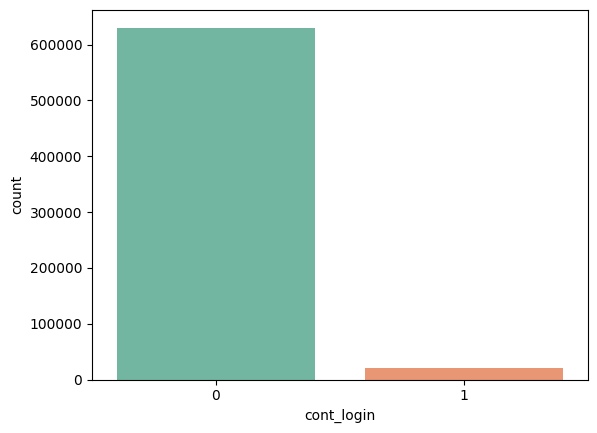

In [38]:
sns.countplot(x='cont_login', data=data, palette='Set2');

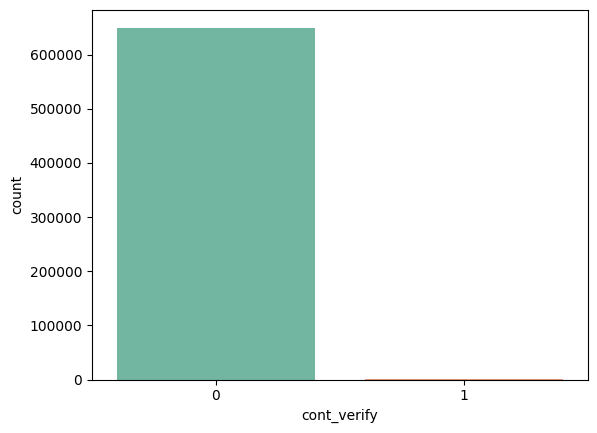

In [39]:
sns.countplot(x='cont_verify', data=data, palette='Set2');

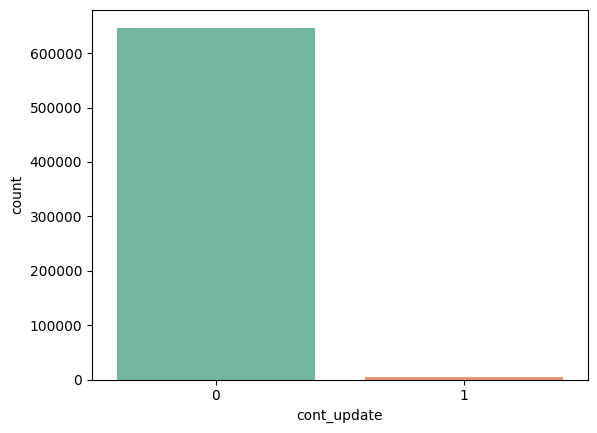

In [40]:
sns.countplot(x='cont_update', data=data, palette='Set2');

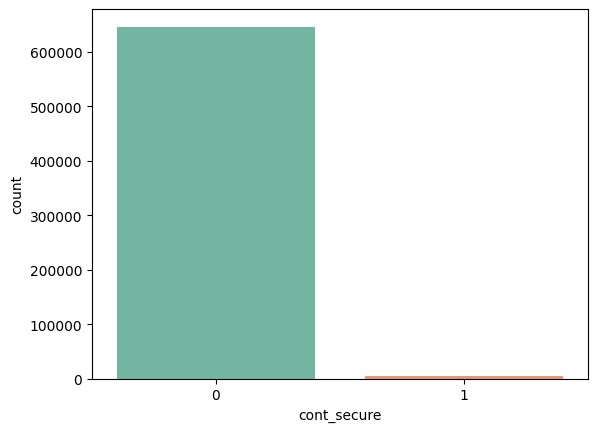

In [41]:
sns.countplot(x='cont_secure', data=data, palette='Set2');

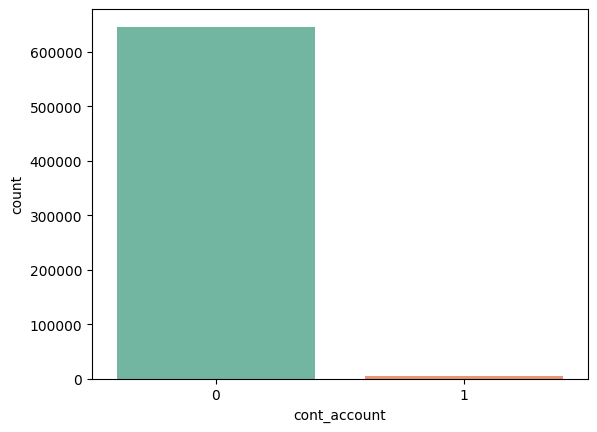

In [42]:
sns.countplot(x='cont_account', data=data, palette='Set2');

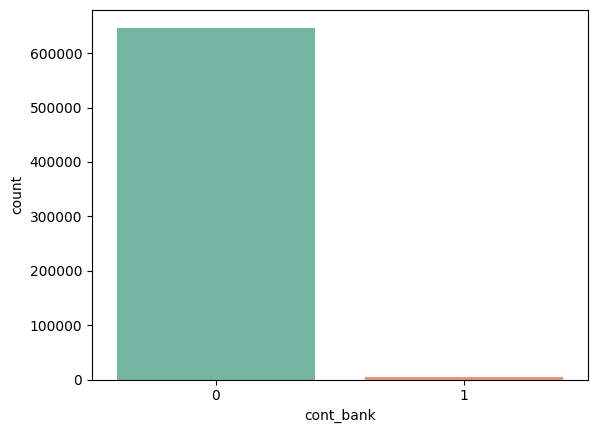

In [43]:
sns.countplot(x='cont_bank', data=data, palette='Set2');

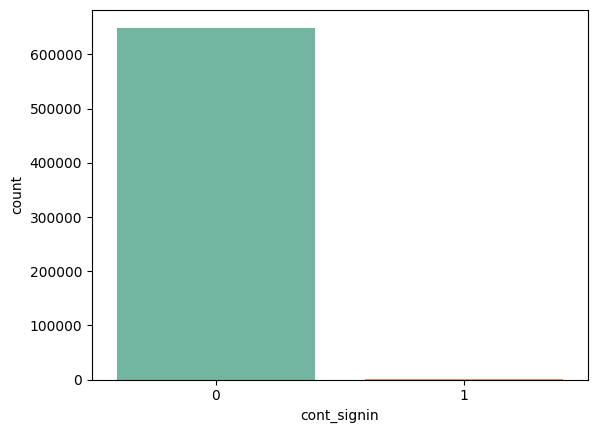

In [44]:
sns.countplot(x='cont_signin', data=data, palette='Set2');

In [45]:
keywords = [col for col in data.columns if col.startswith('cont_')]
analysis = data[['Category'] + keywords]

category_keyword_relation = analysis.groupby('Category').mean()

print(category_keyword_relation)

          cont_login  cont_verify  cont_update  cont_secure  cont_account  \
Category                                                                    
0           0.036746     0.000820      0.00633     0.008052      0.007578   
1           0.022256     0.004366      0.00645     0.005509      0.010216   

          cont_bank  cont_signin  
Category                          
0          0.006795     0.001537  
1          0.005886     0.004348  


- login
    - 정상 사이트(0): 3.67%의 URL이 "login" 키워드를 포함.
    - 피싱 사이트(1): 2.23%의 URL이 "login" 키워드를 포함.

- verify
    - 정상 사이트(0): 0.08%의 URL이 "verify" 키워드를 포함.
    - 피싱 사이트(1): 0.44%의 URL이 "verify" 키워드를 포함.

- update
    - 정상 사이트(0): 0.63%의 URL이 "update" 키워드를 포함.
    - 피싱 사이트(1): 0.65%의 URL이 "update" 키워드를 포함.

- secure
    - 정상 사이트(0): 0.81%의 URL이 "secure" 키워드를 포함.
    - 피싱 사이트(1): 0.55%의 URL이 "secure" 키워드를 포함.

- account
    - 정상 사이트(0): 0.76%의 URL이 "account" 키워드를 포함.
    - 피싱 사이트(1): 1.02%의 URL이 "account" 키워드를 포함.

- bank
    - 정상 사이트(0): 0.68%의 URL이 "bank" 키워드를 포함.
    - 피싱 사이트(1): 0.59%의 URL이 "bank" 키워드를 포함.

- signin
    - 정상 사이트(0): 0.15%의 URL이 "signin" 키워드를 포함.
    - 피싱 사이트(1): 0.43%의 URL이 "signin" 키워드를 포함.

- verify와 signin 키워드는 피싱 사이트(1)에서 정상 사이트(0)보다 더 높은 비율로 나타남
- login, secure, bank 키워드는 정상 사이트(0)에서 더 높은 비율로 나타남
- update와 account 키워드는 피싱 사이트(1)에서 비슷하거나 약간 더 높은 비율로 나타남